## 共轭梯度

In [34]:
import numpy as np

In [86]:
def conjugate_gradient(A, b, x0, tol=1e-8, num_epochs=100):
    x = [x0]
    r0 = b - A @ (x[0].reshape(1, -1).T) # 2*1
    r = r0
    v = r
    for k in range(num_epochs):
        alpha = (v.T @ r) / (v.T @ A @ v)
        x.append((x[k] + alpha * v.T).flatten())
        r = r - alpha * A @ v
        if np.linalg.norm(r)**2 < tol * np.linalg.norm(r0)**2:
            print("The number of iteration: {}".format(k + 1))
            break
            
        v = r - (((A @ v).T @ r) / (v.T @ v)) * v
    return x[k+1], x

## $f(x, y) = \left(x + 2 y - 7\right)^{2} + \left(2 x + y - 5\right)^{2}$， 找到它的最小值

In [87]:
import matplotlib.pyplot as plt

In [88]:
f = lambda X: (X[0] + 2 * X[1] - 7)**2 + (2 * X[0] + X[1] - 5)**2

In [89]:
A = np.array([[10, 8], [8, 10]])
b = np.array([[34], [38]])

In [90]:
mini, iter_pts = conjugate_gradient(A, b, np.array([-8, -8]))
mini

The number of iteration: 13


array([1.00160337, 2.9994089 ])

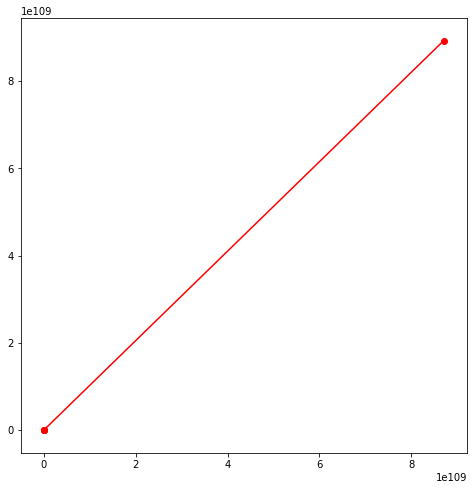

In [60]:
xn = np.linspace(-10, 10, 100)
yn = np.linspace(-10, 10, 100)
xxn, yyn = np.meshgrid(xn, yn)
Xn = np.c_[xxn.ravel(), yyn.ravel()]
fn = np.array([f(xy) for xy in Xn]).reshape(xxn.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xxn, yyn, fn)
plt.plot(np.array(iter_pts)[:, 0], np.array(iter_pts)[:, 1], 'r')
plt.scatter(np.array(iter_pts)[:, 0], np.array(iter_pts)[:, 1], c='r')
plt.scatter(mini[0], mini[1], c="yellow", marker="*", s=100)
plt.show()